### Part A

###### Goal : Investigate the performance of a number of machine learning procedures on "CE802_P3_Data.csv" dataset. Perform a comparative study of the following machine learning procedures:  Linear Regression;  at least two more ML technique to predict the target value.

In [1]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message="The default value of numeric_only in DataFrame.corr is deprecated.")

# Changing numpy settings so that it prints arrays without truncation.
np.set_printoptions(threshold=np.inf)

# Load the dataset
df = pd.read_csv('CE802_P3_Data.csv')

# quick look to data
#Print the first 5 rows of the dataframe.
df.head()

F1     F2     F3       F4    F5     F6     F7       F8     F9      F10  \
0   9.18  35.98  21.36  4520.91  1.25 -40.80  12.82 -2169.72 -15.03   996.53   
1   5.94  35.28  28.02  2403.84  2.46 -16.62  23.32 -4013.31 -16.17  1042.66   
2   2.70  36.02   5.06  4452.39 -1.20  28.38   7.26 -4518.75   4.14  1223.95   
3  11.12  23.08  24.54  3280.86  0.48  60.82  44.08 -5065.47 -26.67  1482.16   
4   7.78  27.62  21.70  2337.15  0.08  62.42 -39.02 -4555.65  -3.48   811.52   

   ...    F26  F27      F28        F29       F30      F31     F32     F33  \
0  ... -22.57    6  3885.47        Low  -7304.02 -2536.91    Rest  163.96   
1  ... -61.05    4  9841.64  Very high   1174.24 -2541.68  Europe -822.18   
2  ... -62.48    2   114.90   Very low -16999.90 -2354.30      UK -801.15   
3  ... -76.45    2  4022.62   Very low  -9313.50 -2626.67  Europe -944.38   
4  ... -97.78    2  -251.62  Very high  -3948.42 -2471.47     USA -762.13   

     F34  Target  
0   4.59  296.76  
1   2.43  484.06  
2   8.85  123.29  
3  12.39   -8.93  
4   8.46   68.28  

[5 rows x 35 columns]

###### Basic Exploratory Data Analysis (EDA) and statistical analysis

In [2]:
# summary of statistics
df.info(verbose=True)
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1400 non-null   float64
 1   F2      1400 non-null   float64
 2   F3      1400 non-null   float64
 3   F4      1400 non-null   float64
 4   F5      1400 non-null   float64
 5   F6      1400 non-null   float64
 6   F7      1400 non-null   float64
 7   F8      1400 non-null   float64
 8   F9      1400 non-null   float64
 9   F10     1400 non-null   float64
 10  F11     1400 non-null   float64
 11  F12     1400 non-null   float64
 12  F13     1400 non-null   float64
 13  F14     1400 non-null   float64
 14  F15     1400 non-null   float64
 15  F16     1400 non-null   float64
 16  F17     1400 non-null   float64
 17  F18     1400 non-null   float64
 18  F19     1400 non-null   float64
 19  F20     1400 non-null   float64
 20  F21     1400 non-null   float64
 21  F22     1400 non-null   float64
 22  

count          mean           std       min         25%        50%  \
F1      1400.0     10.815971      8.620017    -36.26      6.7300     10.860   
F2      1400.0     34.895929      8.638747     -5.86     30.5400     34.810   
F3      1400.0     21.734114      8.230342    -33.66     17.4550     21.720   
F4      1400.0   3409.494514    874.972405    511.23   2811.2850   3399.405   
F5      1400.0     -0.289907      4.304120    -36.62     -2.3100     -0.210   
F6      1400.0     46.915914     59.844389   -164.52      8.4550     47.580   
F7      1400.0     -1.454379     44.036834   -193.86    -23.6425     -1.375   
F8      1400.0  -3412.387457    881.199575  -6677.61  -4012.7250  -3402.630   
F9      1400.0    -14.330593      8.822352    -43.44    -20.1600    -13.905   
F10     1400.0    899.903400    300.542318    -69.91    695.9400    888.685   
F11     1400.0    102.147150     91.500104   -180.30     39.6300    101.955   
F12     1400.0    -90.917664     44.715871   -332.92   -111.6100    -90.260   
F13     1400.0    -72.867793     12.419849   -142.53    -79.0275    -72.870   
F14     1400.0  -2406.857850    932.217719  -6141.81  -3023.2800  -2405.490   
F15     1400.0      6.452464      9.185636    -30.24      0.0300      6.600   
F16     1400.0  23170.138414  11982.088326 -24719.31  17435.7525  23123.520   
F17     1400.0    310.572664    304.770992   -598.63    104.6300    307.065   
F18     1400.0    313.764514   4541.146547      0.00      0.3900      3.000   
F19     1400.0      7.983271      5.633110      0.10      3.7950      6.640   
F20     1400.0    -88.186979     29.839187   -190.67   -108.1125    -87.760   
F21     1400.0   2891.293986    868.508078  -2139.62   2474.5500   2904.110   
F22     1400.0   2356.812343    827.356749  -1788.84   1943.7200   2348.040   
F23     1400.0      8.012857      3.652896      0.00      6.0000      8.000   
F24     1400.0     23.357457      7.943938     -7.00     19.2600     23.460   
F25     1400.0  -2259.963871    605.032845  -4493.36  -2661.1400  -2259.810   
F26     1400.0    -72.337129     30.591408   -169.55    -93.5000    -72.175   
F27     1400.0      4.077143      1.797001      0.00      3.0000      4.000   
F28     1400.0   2229.788621   2995.345402  -8647.02    251.9350   2264.125   
F30     1400.0  -6513.073157   5932.650871 -25593.90 -10610.0900  -6619.680   
F31     1400.0  -2189.156229    423.511145  -4475.52  -2408.4600  -2192.005   
F33     1400.0   -618.271186    299.882866  -1567.10   -808.8725   -611.795   
F34     1400.0     11.865429      8.564316      0.09      5.6700      9.840   
Target  1400.0    181.948593    207.330137     -8.93     -8.9300    114.145   

               75%        max  
F1         14.9500      55.70  
F2         39.0900      87.86  
F3         25.5450      53.82  
F4       3997.1700    6366.18  
F5          1.7725      18.91  
F6         86.9600     251.22  
F7         19.1350     227.43  
F8      -2807.2425    -772.17  
F9         -8.5500      13.14  
F10      1106.7650    1855.95  
F11       166.6275     394.95  
F12       -69.0925     150.42  
F13       -66.7200     -14.67  
F14     -1756.8900     285.15  
F15        12.8475      33.72  
F16     29170.6500   70354.38  
F17       507.8150    1504.96  
F18        20.8350  131174.64  
F19        10.8650      34.68  
F20       -68.4825      11.59  
F21      3327.4450    7099.44  
F22      2776.8400    6296.78  
F23        10.0000      22.00  
F24        27.7000      61.74  
F25     -1851.8400     380.34  
F26       -52.3625      31.54  
F27         5.0000      11.00  
F28      4323.0525   12228.69  
F30     -2420.1200   11198.80  
F31     -1973.0400     346.93  
F33      -414.7525     389.71  
F34        15.8475      66.81  
Target    300.2725     750.78

In [3]:
# A value of zero does not make sense and thus indicates missing value.
# Following columns or variables have an invalid zero value:F23 and F27.
# Replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values
df_copy = df.copy(deep = True)
df_copy[['F23','F27']] = df_copy[['F23','F27']].replace(0,np.NaN)

## showing the count of Nans
print(df_copy.isnull().sum())

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20        0
F21        0
F22        0
F23       22
F24        0
F25        0
F26        0
F27       14
F28        0
F29        0
F30        0
F31        0
F32        0
F33        0
F34        0
Target     0
dtype: int64


###### Data Visualisation

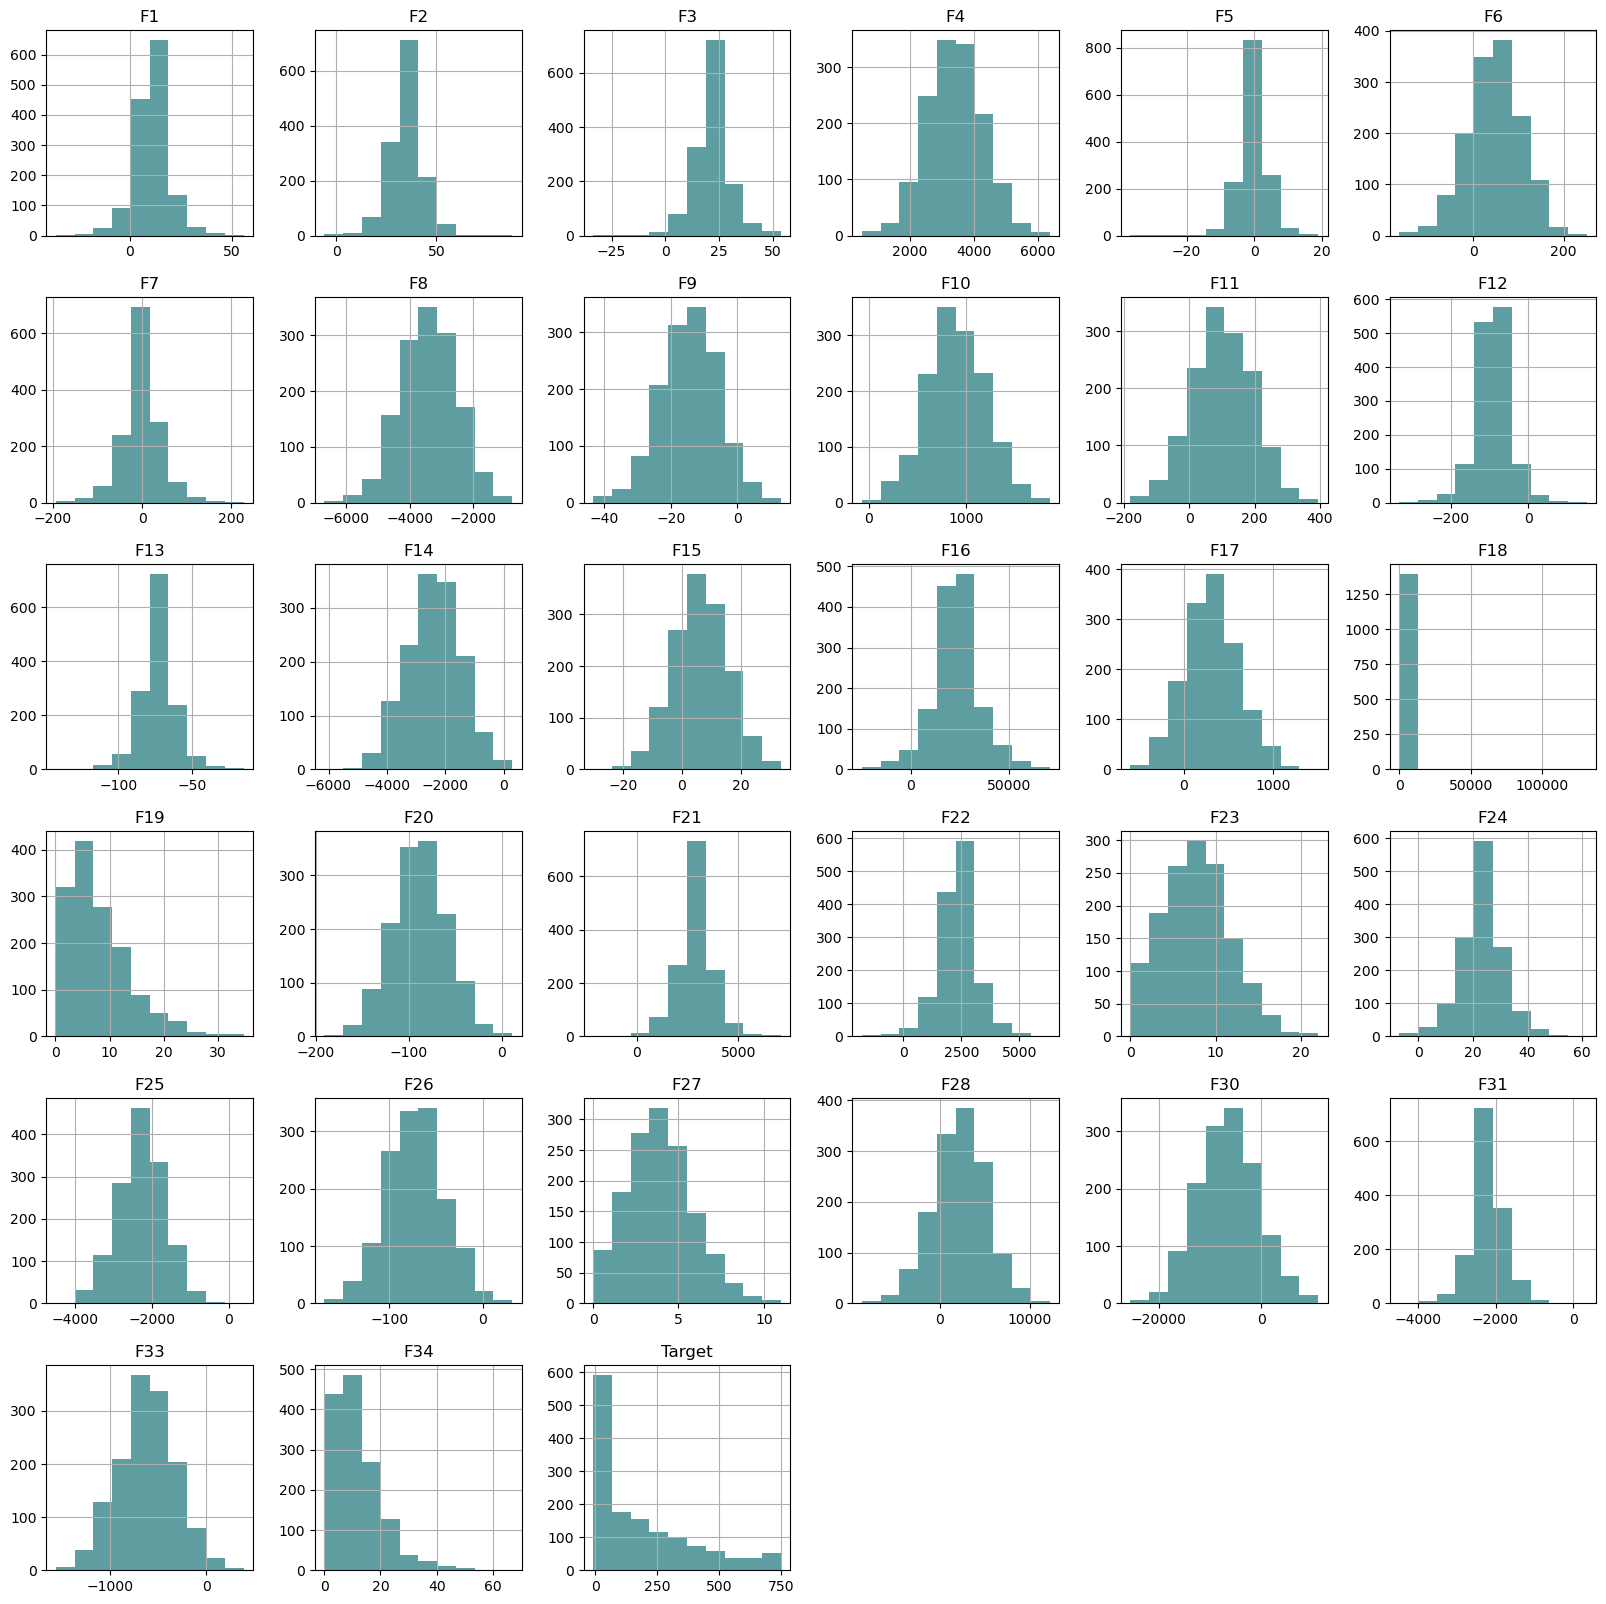

In [4]:
# To fill these Nan values the data distribution needs to be understood
p = df.hist(figsize = (20,20),color = "#5F9EA0")

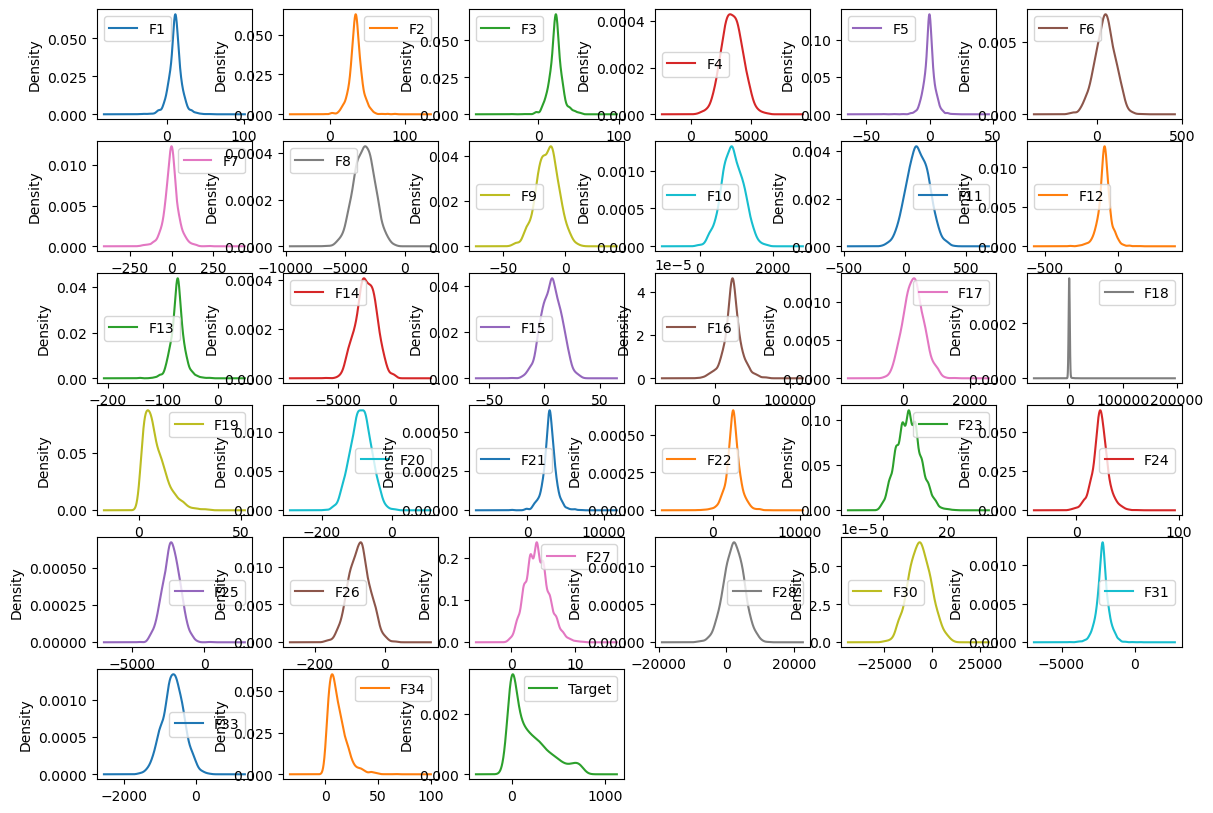

In [5]:
# Lets see the distributions of each features even more clearly using desity plots

df.plot(kind = "density", subplots = True, layout = (6,6), sharex =False, figsize = (14,10))
plt.show();

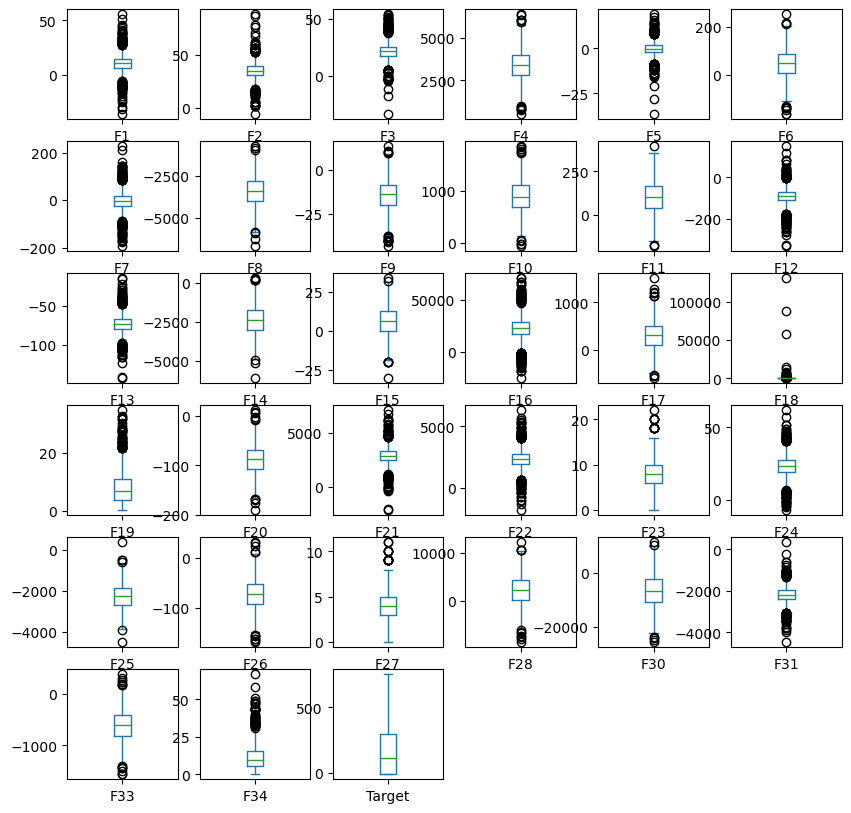

In [6]:
# Lets see the boxplots to check any outliers in our data

df.plot(kind = "box", subplots = True, layout = (6,6), sharex = False, sharey = False, figsize = (10,10))
plt.show();

###### We can see that some amount of outliers is present.

In [7]:
#Aiming to impute nan values for the columns in accordance with their distribution
df_copy['F23'].fillna(df_copy['F23'].mean(), inplace = True)
df_copy['F27'].fillna(df_copy['F27'].mean(), inplace = True)

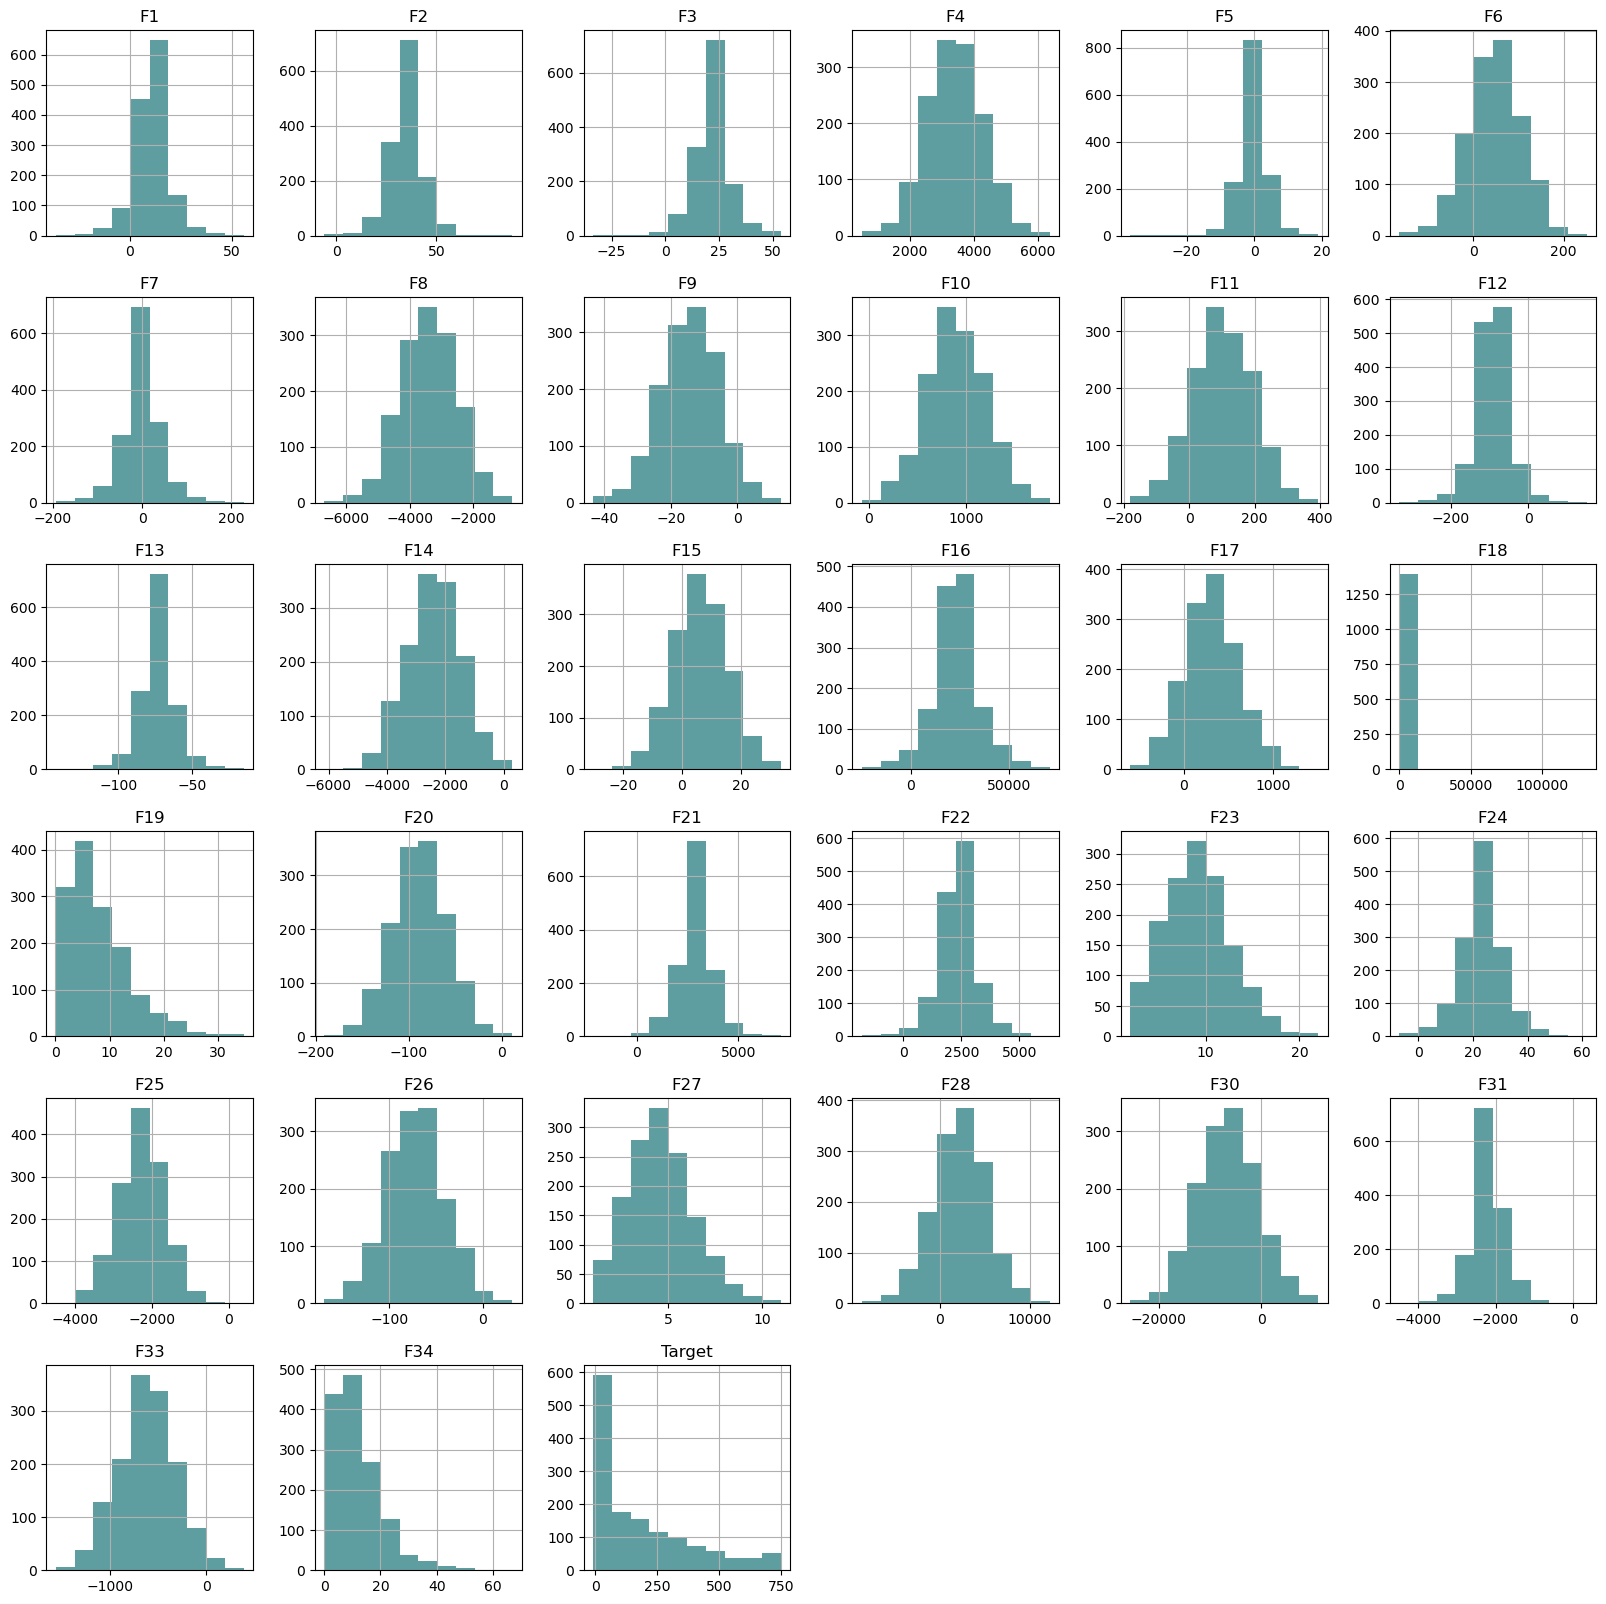

In [8]:
#Plotting after Nan removal
p = df_copy.hist(figsize = (20,20),color = "#5F9EA0")

In [9]:
#check for missing values
df.isna().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
F17       0
F18       0
F19       0
F20       0
F21       0
F22       0
F23       0
F24       0
F25       0
F26       0
F27       0
F28       0
F29       0
F30       0
F31       0
F32       0
F33       0
F34       0
Target    0
dtype: int64

###### No missing values found.

In [10]:
# Lets see the correlation matrix between all features
df.corr()

F1        F2        F3        F4        F5        F6        F7  \
F1      1.000000  0.035293 -0.002382 -0.013681 -0.022135  0.024832 -0.007109   
F2      0.035293  1.000000  0.009154 -0.019997 -0.039508  0.019563 -0.043058   
F3     -0.002382  0.009154  1.000000  0.022619  0.047844 -0.010240 -0.065609   
F4     -0.013681 -0.019997  0.022619  1.000000  0.029891 -0.021781 -0.010451   
F5     -0.022135 -0.039508  0.047844  0.029891  1.000000 -0.031938  0.011663   
F6      0.024832  0.019563 -0.010240 -0.021781 -0.031938  1.000000  0.003312   
F7     -0.007109 -0.043058 -0.065609 -0.010451  0.011663  0.003312  1.000000   
F8      0.046466  0.014783  0.007190 -0.027178  0.005484 -0.033430  0.023228   
F9      0.017701 -0.033666  0.017408 -0.022475 -0.020003  0.005181 -0.027136   
F10    -0.026985 -0.010963  0.031770  0.063828  0.054917 -0.075118  0.055084   
F11     0.043013  0.013060 -0.014166 -0.034830  0.012807  0.051771 -0.022311   
F12    -0.005556 -0.015176 -0.009448  0.016220 -0.018494 -0.010623  0.004878   
F13     0.027194 -0.020440  0.012732  0.030074 -0.032722 -0.013594  0.036208   
F14    -0.051038 -0.014843  0.006526  0.003586 -0.011798  0.015075 -0.004733   
F15     0.029011  0.014759 -0.012824 -0.017175  0.015003 -0.018484 -0.041567   
F16     0.025944  0.010646 -0.011879  0.024484  0.019563  0.023727 -0.005307   
F17     0.015598  0.033515  0.017174 -0.065780  0.005810 -0.012484 -0.009592   
F18    -0.005846  0.011405  0.036894  0.038494  0.018838  0.002483 -0.030718   
F19     0.000687 -0.002387  0.040337 -0.004428  0.039182 -0.046953 -0.006240   
F20     0.012099  0.028071  0.014450  0.039771 -0.039338  0.006244 -0.002029   
F21     0.013290 -0.004659 -0.005347  0.035497  0.035517  0.009013  0.020892   
F22     0.008229  0.012683 -0.041838 -0.047381 -0.001700 -0.032125  0.012173   
F23    -0.018911  0.042920  0.013667  0.019944  0.037651  0.028978 -0.010145   
F24    -0.004641  0.005517  0.033954 -0.020266  0.008430 -0.053860  0.044262   
F25     0.019722 -0.004158 -0.002735 -0.049713 -0.055305  0.022060  0.006824   
F26     0.024850  0.026927 -0.010260  0.032283 -0.055327  0.059559 -0.001485   
F27    -0.001292 -0.031115 -0.008970 -0.006667 -0.007434 -0.007188  0.028178   
F28    -0.006804 -0.037109  0.003072 -0.023561 -0.019963 -0.022285 -0.012634   
F30     0.004151  0.016052 -0.017007  0.017902  0.038980 -0.050434 -0.014100   
F31    -0.040747 -0.040900  0.018606  0.006945  0.021326  0.002850 -0.007003   
F33    -0.019019  0.007644  0.026789 -0.032222  0.016692 -0.009671 -0.016249   
F34    -0.040463 -0.021689  0.017953  0.011588  0.000075 -0.017646 -0.001262   
Target  0.021747 -0.032654 -0.035836 -0.007013 -0.045636 -0.001765  0.010281   

              F8        F9       F10  ...       F24       F25       F26  \
F1      0.046466  0.017701 -0.026985  ... -0.004641  0.019722  0.024850   
F2      0.014783 -0.033666 -0.010963  ...  0.005517 -0.004158  0.026927   
F3      0.007190  0.017408  0.031770  ...  0.033954 -0.002735 -0.010260   
F4     -0.027178 -0.022475  0.063828  ... -0.020266 -0.049713  0.032283   
F5      0.005484 -0.020003  0.054917  ...  0.008430 -0.055305 -0.055327   
F6     -0.033430  0.005181 -0.075118  ... -0.053860  0.022060  0.059559   
F7      0.023228 -0.027136  0.055084  ...  0.044262  0.006824 -0.001485   
F8      1.000000 -0.019493 -0.023262  ...  0.013383  0.007693 -0.043980   
F9     -0.019493  1.000000 -0.023766  ...  0.014010 -0.014213 -0.000249   
F10    -0.023262 -0.023766  1.000000  ...  0.032253  0.013722 -0.002088   
F11    -0.011778 -0.001893  0.044864  ...  0.000211  0.038586 -0.017671   
F12     0.031854 -0.036405 -0.005521  ...  0.014303 -0.009590 -0.036575   
F13     0.025463 -0.002169  0.025418  ...  0.022116  0.028202  0.000842   
F14    -0.026936  0.044824 -0.041726  ... -0.029275  0.044208  0.043688   
F15     0.003189  0.011604  0.003985  ... -0.009330 -0.038784 -0.030382   
F16     0.051631 -0.006275  0.023180  ... -0.023813 -0.015088 -0.006683   
F17     0.005059  

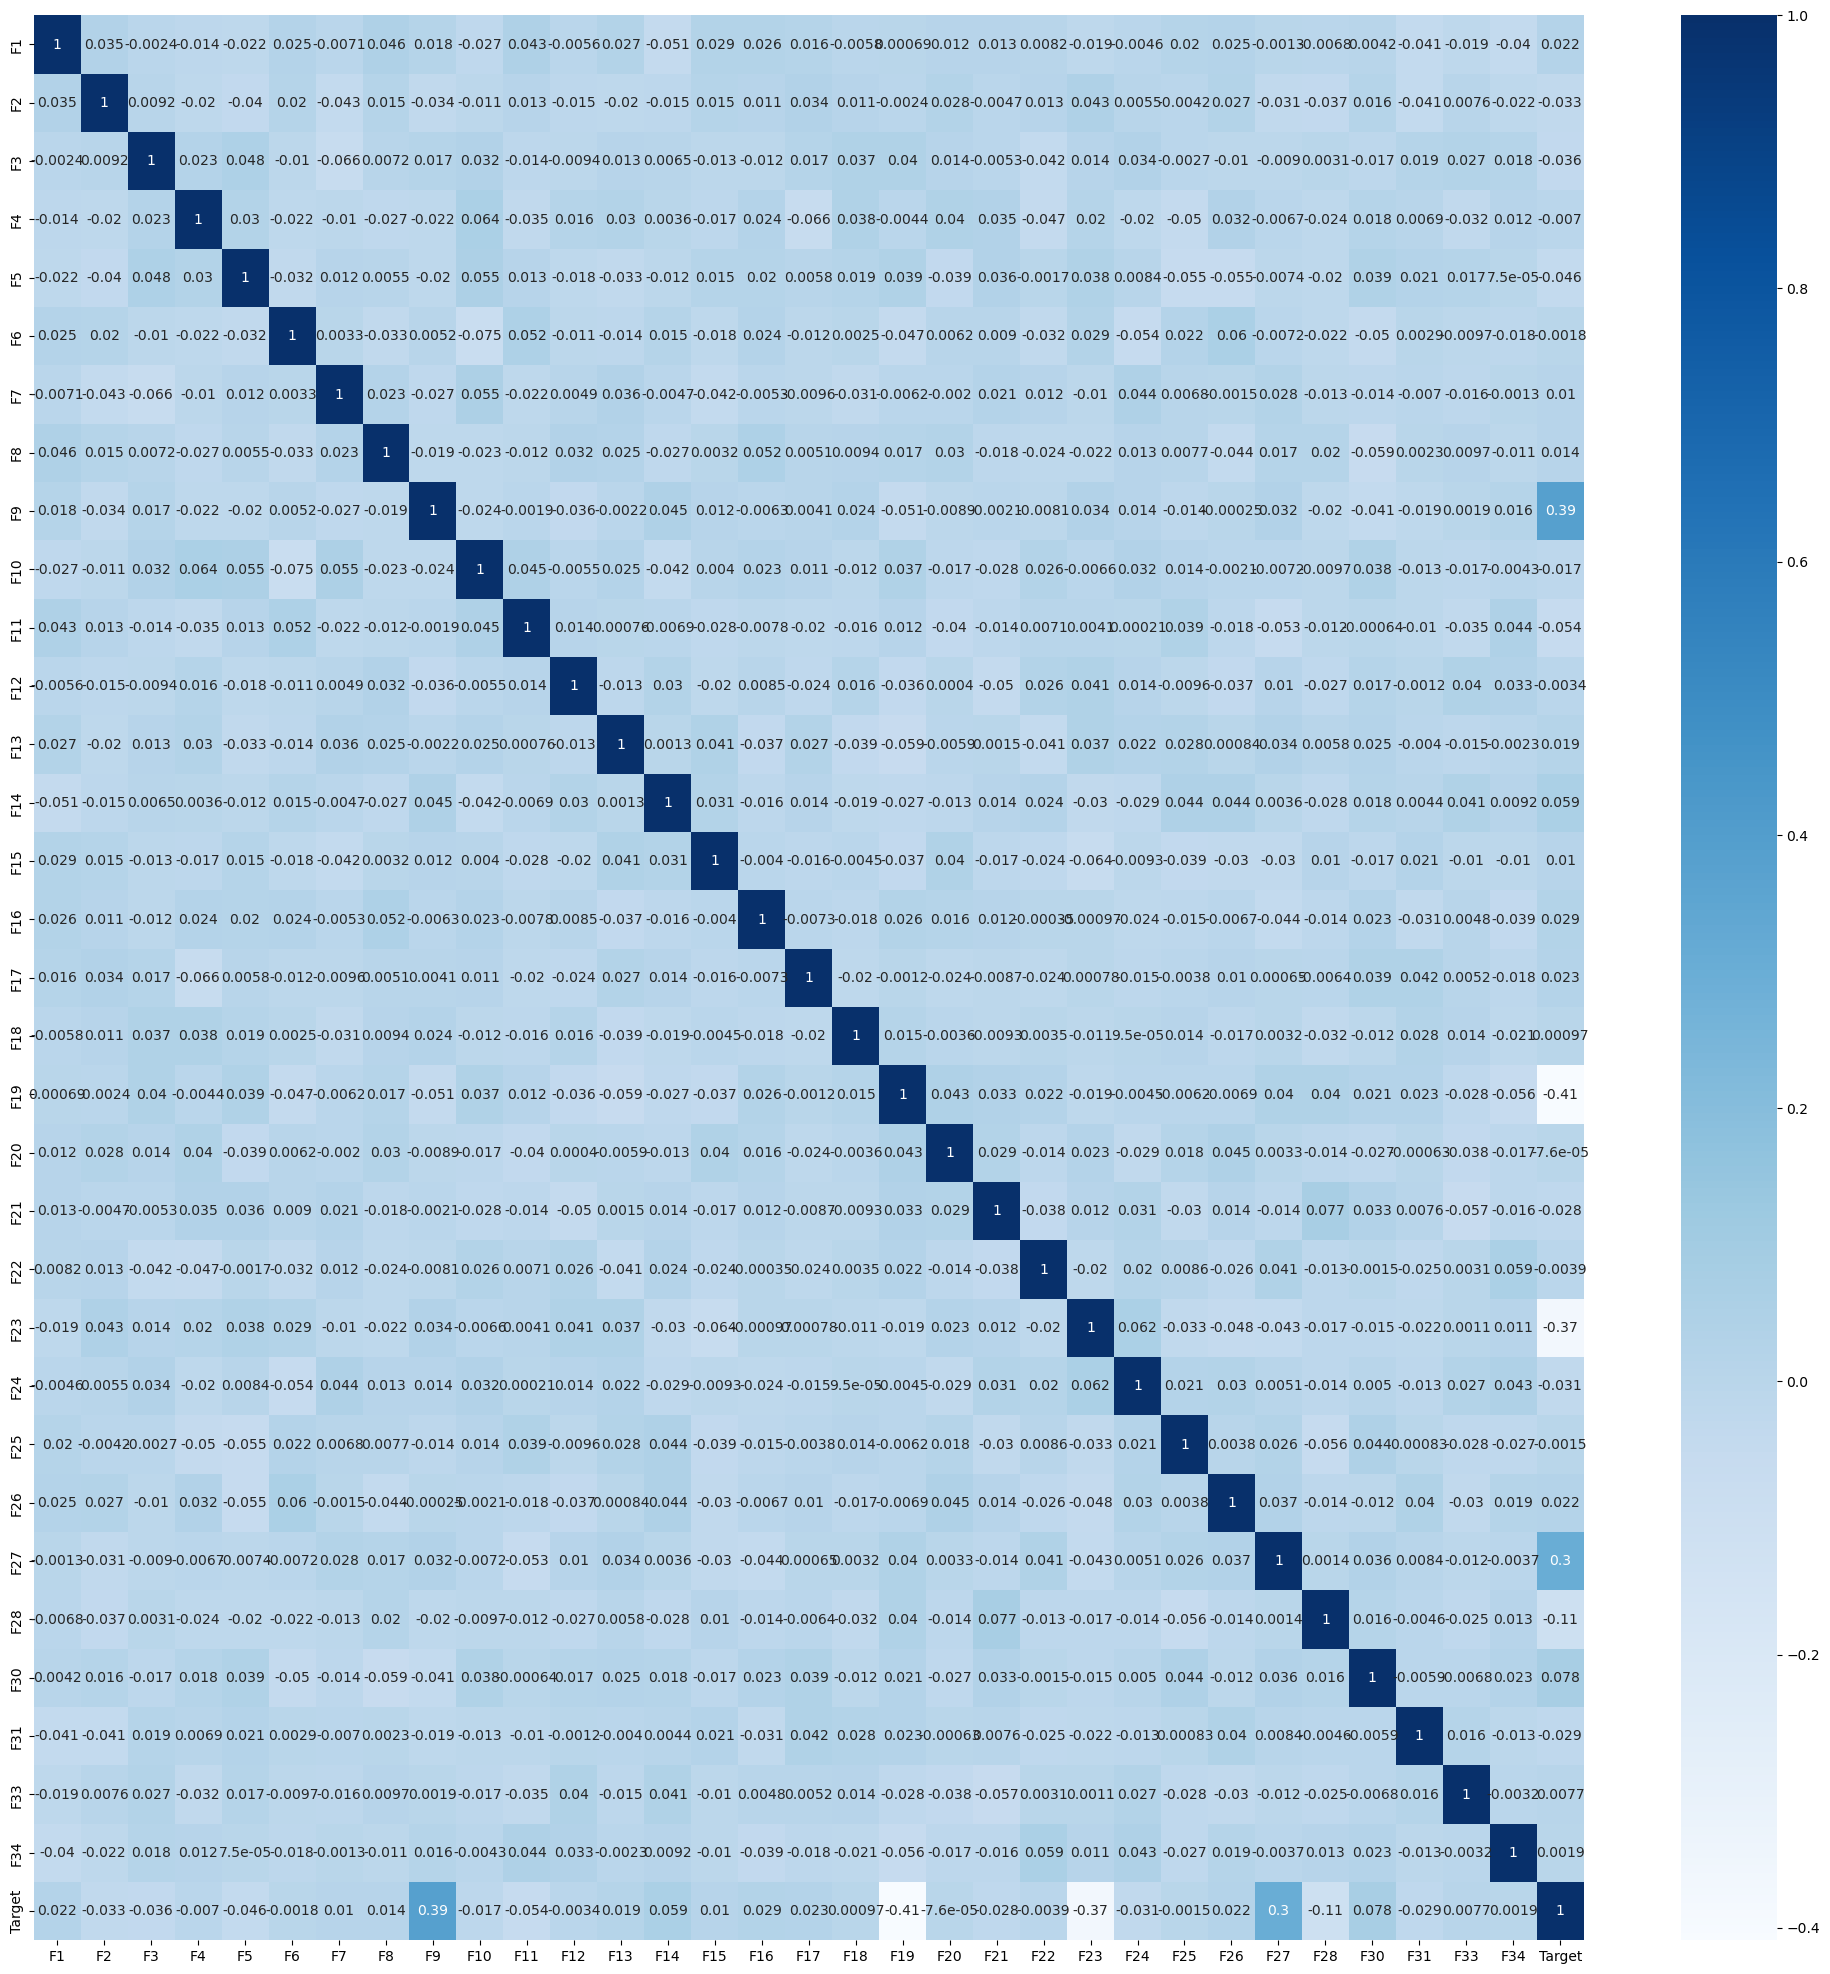

In [11]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues")

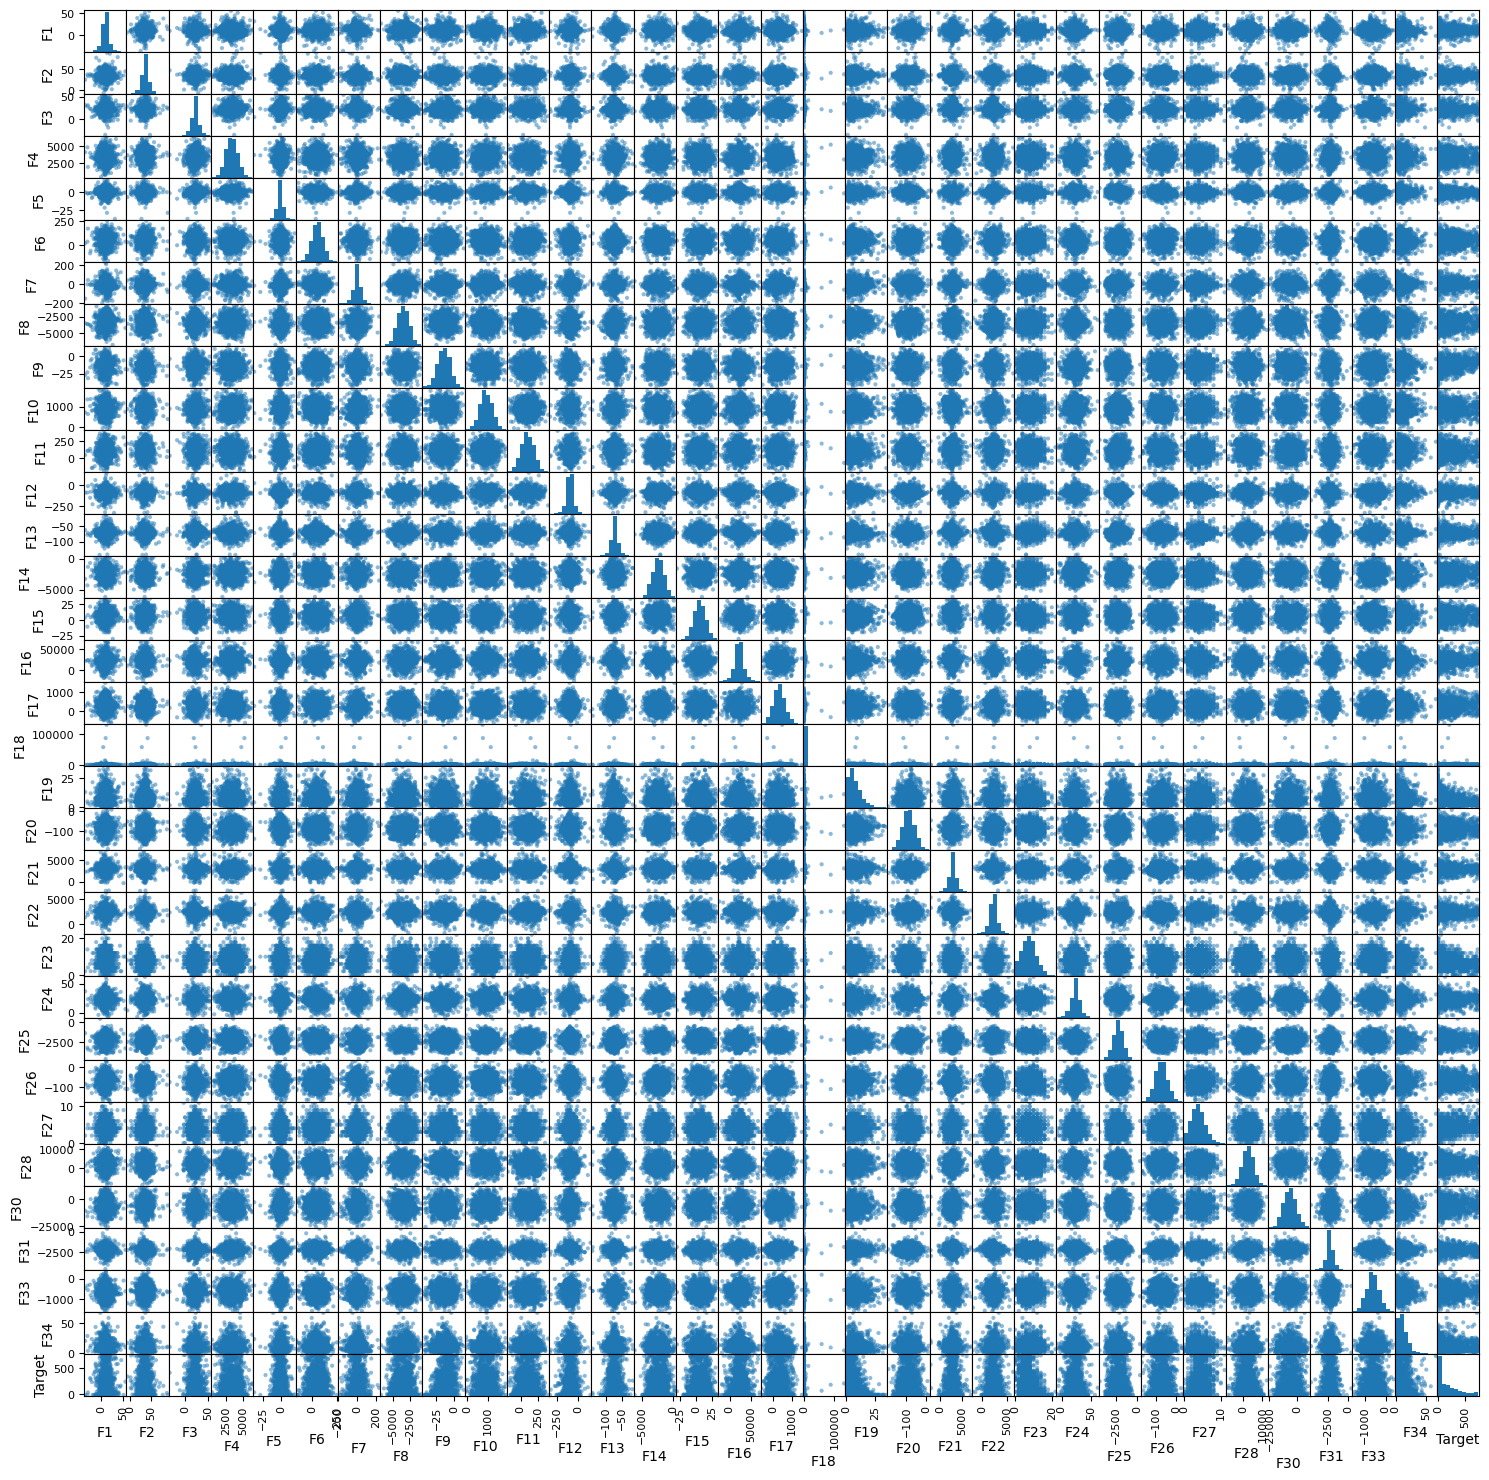

In [13]:
# Scatterplot
from pandas.plotting import scatter_matrix
p=scatter_matrix(df,figsize=(18, 18))

###### Checking value counts of categorical columns

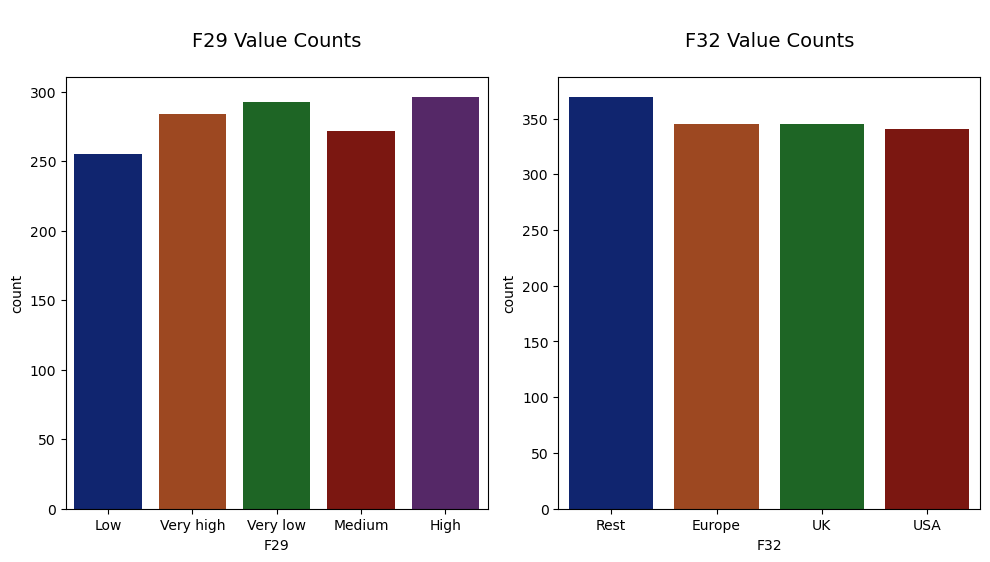

In [14]:
categorical_cols = ['F29', 'F32']

plt.figure(figsize = (10, 20))
plotnumber = 1

# plotting the countplot of each categorical column.

for i in range(len(categorical_cols)):
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(x = categorical_cols[i], data = df, ax = ax, palette='dark')
        plt.title(f"\n{categorical_cols[i]} Value Counts\n", fontsize = 14)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

###### From the above plots, we can conclude that F29 has more values for 'High'. F32 has more values for 'Rest' followed by 'Europe'

###### Exploring relation of categorical columns with target/output column

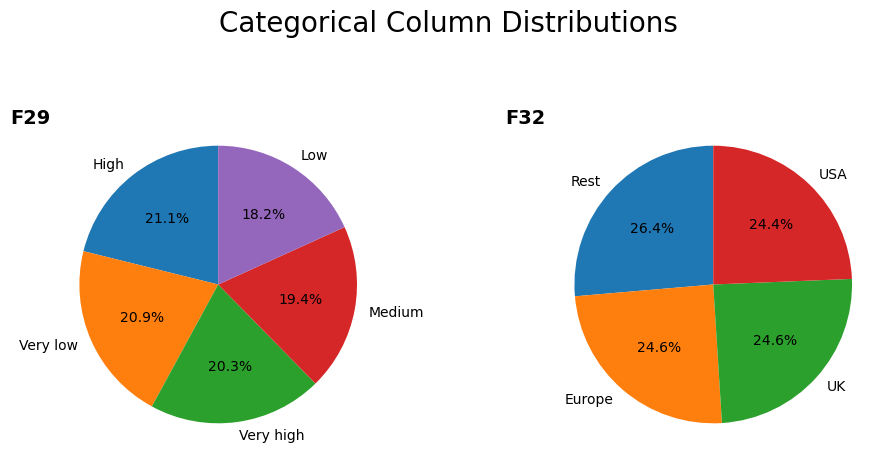

In [15]:
# Get the categorical columns in the data set
categorical_columns = df.select_dtypes(include=['object']).columns

# Create a subplot grid based on the number of categorical columns
fig, axs = plt.subplots(1, len(categorical_columns), figsize=(len(categorical_columns)*5, 5))

# Loop through each categorical column and create a pie chart on a subplot
for i, col in enumerate(categorical_columns):
    # Get the value counts for the column
    counts = df[col].value_counts()
    
    # Plot the pie chart on the subplot
    axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    
    # Add the column name and title to the subplot
    axs[i].set_ylabel('')
    axs[i].text(-1.5, 1.2, col, fontsize=14, fontweight='bold', va='center')
    
# Add a suptitle for the entire figure
fig.suptitle("Categorical Column Distributions", fontsize=20)

# Adjust the spacing between subplots
fig.tight_layout(pad=3)

# Display the plot
plt.show()


###### Exploring relation of numerical columns with target column

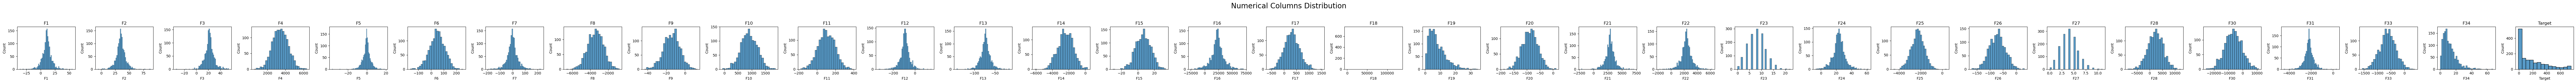

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21',
       'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F30', 'F31', 'F33',
       'F34', 'Target'],
      dtype='object')


In [16]:
import seaborn as sns

numerical_columns = df.select_dtypes(include=['float64','int64']).columns

fig, axes = plt.subplots(1, len(numerical_columns), figsize=(len(numerical_columns)*3, 3))

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(col)

fig.suptitle("Numerical Columns Distribution", fontsize=20, y=1.05)
plt.tight_layout()
plt.show()
print(numerical_columns)

###### Feature Engineering

###### Encoding And Scaling the data

In [17]:
# Convert categorical columns to numeric using LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['F29'] = le.fit_transform(df['F29'])
df['F32'] = le.fit_transform(df['F32'])

# Standardize numerical columns using StandardScaler
num_cols = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
            'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
            'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27','F28','F29','F30','F31','F32','F33','F34']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Show the first five rows of the updated dataset
print(df.head())

         F1        F2        F3        F4        F5        F6        F7  \
0 -0.189855  0.125534 -0.045472  1.270683  0.357903 -1.466257  0.324262   
1 -0.565859  0.044475  0.764018 -1.149766  0.639129 -1.062065  0.562784   
2 -0.941863  0.130166 -2.026656  1.192344 -0.211522 -0.309846  0.197959   
3  0.035283 -1.368271  0.341042 -0.147068  0.178941  0.232420  1.034376   
4 -0.352326 -0.842544 -0.004146 -1.226013  0.085973  0.259166 -0.853355   

         F8        F9       F10  ...       F26       F27       F28       F29  \
0  1.410704 -0.079305  0.321622  ...  1.627415  1.070419  0.552949 -0.706879   
1 -0.682181 -0.208568  0.475166  ...  0.369096 -0.042944  2.542135  0.684028   
2 -1.255967  2.094361  1.078592  ...  0.322334 -1.156307 -0.706311  1.379482   
3 -1.876616 -1.399153  1.938045  ... -0.134493 -1.156307  0.598753  1.379482   
4 -1.297857  1.230337 -0.294185  ... -0.831997 -1.156307 -0.828718  0.684028   

        F30       F31       F32       F33       F34  Target  
0 -0.1

###### Declare feature vector and target variable

In [19]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

###### Create a Validation Dataset

In [20]:
# Split data into features and target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###### Train And Evaluate Models

In [21]:
# Train and Evaluate Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
dtr = DecisionTreeRegressor(random_state=42)
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

# Define the models
models = {
    "Linear Regression": lr,
    "Decision Tree Regression": dtr,
    "Random Forest Regression": rfr,
}

# Train and evaluate the models
rmse_scores = {}
r2_scores = {} 
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    rmse_scores[name] = rmse
    r2_scores[name] = r2  
    print(name)
    print("RMSE:", rmse)
    print("R^2:", r2)
    print()

# Choose the best model
best_model_name = min(rmse_scores, key=rmse_scores.get)
best_model = models[best_model_name]
print("Best Model:", best_model_name)
print("Best RMSE:", rmse_scores[best_model_name])
print("Best R^2:", r2_scores[best_model_name])

Linear Regression
RMSE: 114.10781235291934
R^2: 0.6577128178605154

Decision Tree Regression
RMSE: 188.5447876746682
R^2: 0.06547927065712345

Random Forest Regression
RMSE: 105.77826321577065
R^2: 0.7058609119281478

Best Model: Random Forest Regression
Best RMSE: 105.77826321577065
Best R^2: 0.7058609119281478


In [22]:
print("Weight:", lr.coef_)
print("The intercept is:", lr.intercept_)

Weight: [ -1.19745047  -1.93909603  -2.61463162  -3.73846787  -2.61174577
  -0.82170263   4.43690719   2.82183121  77.15584363   0.34790794
  -3.78842092   4.35905084   2.54674463   2.80411404  -5.41554059
   6.52594536  -1.21423757  -1.1729815  -85.16349892   2.57331266
   0.38502504  -6.76004733 -79.12746379  -3.39694101  -5.70632581
  -3.92840737  59.05451625 -21.74975908 -18.67119473  18.95649362
  -1.46541608 -71.3264174    1.81491404  -5.92997043]
The intercept is: 185.1714227057071


###### The Random Forest Regression is the best-performing model, with an R2 score of 0.705 and an RMSE of 105.77.Therefore, we will choose Random Forest Regression for predictions in Part B.

### Part B

###### Goal: Prediction on a hold-out test set.Produce class predictions of the records in the test set using one approach of your choice among those tested in task “a” (for example the one achieving the best performance). Target values are withheld for this test set (i.e. the “Target” column is empty).

In [26]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P3_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()
test_data['F29'] = le.fit_transform(test_data['F29'])
test_data['F32'] = le.fit_transform(test_data['F32'])

# Standardize numerical columns using StandardScaler
num_cols = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
            'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
            'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27','F28','F29','F30','F31','F32','F33','F34']
scaler = StandardScaler()
test_data[num_cols] = scaler.fit_transform(test_data[num_cols])
predicted = rfr.predict(test_data) # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])